<a href="https://colab.research.google.com/github/taukirazam16/PyTorch-Practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import torch
 import torch.nn as nn
 import torch.nn.functional as F
 import torchvision
 import torchvision.transforms as transforms
 import matplotlib.pyplot as plt
 import numpy as np
 

In [ ]:
#device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
#hyper parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [ ]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [ ]:
print(labels)
print(images.shape)

tensor([7, 9, 9, 4])
torch.Size([4, 3, 32, 32])


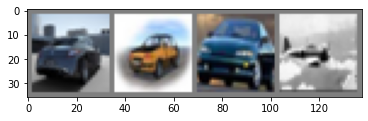

In [ ]:
# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
images.shape

torch.Size([4, 3, 32, 32])

Batch size = 4, Color = 3, image = 32*32

In [ ]:
print("Shape of Image before conv: ",images.shape)
conv1 = nn.Conv2d(3,6,5)
x = conv1(images)
print("Shape of image after 1st Conv1: ", x.shape)
pool = nn.MaxPool2d(2,2)
x = pool(x)
print("Shape of image after MaxPool: ", x.shape)
conv1 = nn.Conv2d(6,16,5)
x = conv1(x)
print("Shape of image after 2nd Conv1: ", x.shape)
x = pool(x)
print("Shape of image after 2nd MaxPool: ", x.shape)

Shape of Image before conv:  torch.Size([4, 3, 32, 32])
Shape of image after 1st Conv1:  torch.Size([4, 6, 28, 28])
Shape of image after MaxPool:  torch.Size([4, 6, 14, 14])
Shape of image after 2nd Conv1:  torch.Size([4, 16, 10, 10])
Shape of image after 2nd MaxPool:  torch.Size([4, 16, 5, 5])


In [ ]:
class ConvNet(nn.Module):
  #3 = color channel
  #output = 6, kernel = 5
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
  #16*5*5 because after conv1, pool, conv1,pool the image size became
  # 16*5*5
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  # 10 because 10 output


  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    #-1 means it sees the other value, and calculates itself
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    # no activation function in fc3 because we use cross entropy and 
    # and that doesnt need activation
    return x

  



In [ ]:
model = ConvNet().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [ ]:
n_total_steps = len(train_loader)
n_total_steps

12500

In [ ]:
for epoch in range(num_epochs):
   for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [2000/12500], Loss: 2.2827
Epoch [1/5], Step [4000/12500], Loss: 2.3274
Epoch [1/5], Step [6000/12500], Loss: 2.2661
Epoch [1/5], Step [8000/12500], Loss: 2.2613
Epoch [1/5], Step [10000/12500], Loss: 2.4116
Epoch [1/5], Step [12000/12500], Loss: 2.1507
Epoch [2/5], Step [2000/12500], Loss: 2.2716
Epoch [2/5], Step [4000/12500], Loss: 2.3056
Epoch [2/5], Step [6000/12500], Loss: 1.9909
Epoch [2/5], Step [8000/12500], Loss: 2.0360
Epoch [2/5], Step [10000/12500], Loss: 2.1977
Epoch [2/5], Step [12000/12500], Loss: 1.8196
Epoch [3/5], Step [2000/12500], Loss: 1.7678
Epoch [3/5], Step [4000/12500], Loss: 1.8028
Epoch [3/5], Step [6000/12500], Loss: 2.0233
Epoch [3/5], Step [8000/12500], Loss: 1.1029
Epoch [3/5], Step [10000/12500], Loss: 2.0494
Epoch [3/5], Step [12000/12500], Loss: 1.3941
Epoch [4/5], Step [2000/12500], Loss: 1.5396
Epoch [4/5], Step [4000/12500], Loss: 1.7150
Epoch [4/5], Step [6000/12500], Loss: 1.5010
Epoch [4/5], Step [8000/12500], Loss: 2.2482
Epoc

In [ ]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 46.02 %
Accuracy of plane: 51.2 %
Accuracy of car: 70.8 %
Accuracy of bird: 38.6 %
Accuracy of cat: 33.9 %
Accuracy of deer: 36.6 %
Accuracy of dog: 33.2 %
Accuracy of frog: 60.7 %
Accuracy of horse: 48.0 %
Accuracy of ship: 46.0 %
Accuracy of truck: 41.2 %


In [ ]:
model

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)